In [5]:
import numpy as np

def denoise(im, U_init, tolerance=0.1, tau=0.125, tv_weight=100):

    m,n = im.shape #size of noisy image

    U = U_init
    Px = im #x-component to the dual field 
    Py = im #y-component of the dual field 
    error = 1

    while (error > tolerance):
    
        Uold = U
        # gradient of primal variable
        GradUx = np.roll(U,-1,axis=1)-U # x-component of U’s 
        GradUy = np.roll(U,-1,axis=0)-U # y-component of U’s
          # update the dual varible

        PxNew = Px + (tau/tv_weight)*GradUx
        PyNew = Py + (tau/tv_weight)*GradUy
        NormNew = np.maximum(1,np.sqrt(PxNew**2+PyNew**2))

        Px = PxNew/NormNew # update of x-component (dual) 
        Py = PyNew/NormNew # update of y-component (dual)

        # update the primal variable

        RxPx = np.roll(Px,1,axis=1) # right x-translation of 
        RyPy = np.roll(Py,1,axis=0) # right y-translation of

        DivP = (Px-RxPx)+(Py-RyPy) # divergence of the dual field. 
        U = im + tv_weight*DivP # update of the primal variable
          # update of error

        error = np.linalg.norm(U-Uold)/np.sqrt(n*m)
    
    return U, im-U # denoised image and texture residual

In [2]:
im = np.zeros((500,500))
im[100:400,100:400] = 128
im[200:300,200:300] = 255
im = im + 30*np.random.standard_normal((500,500))

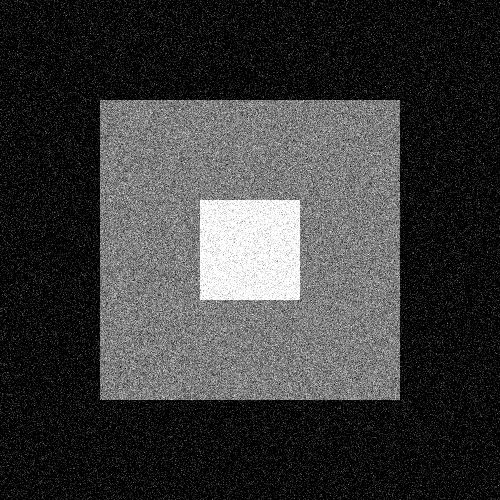

In [4]:
from PIL import Image

Image.fromarray(im).convert('L')

In [7]:
U, T = denoise(im, im)

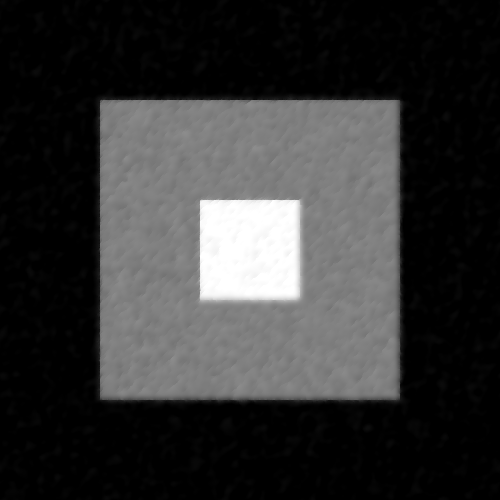

In [9]:
Image.fromarray(U).convert('L')

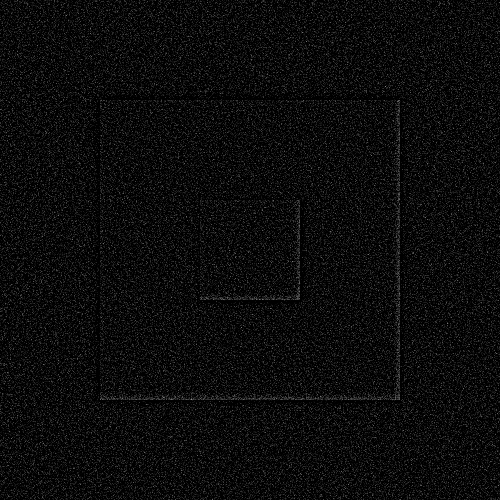

In [10]:
Image.fromarray(T).convert('L') # residual Image

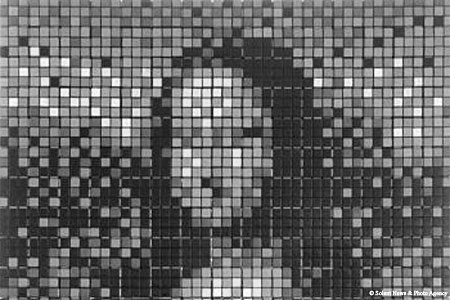

In [11]:
from PIL import Image

im = np.array(Image.open('ru.jpg').convert('L'))
Image.open('ru.jpg').convert('L')

In [8]:
U, T = denoise(im, im)

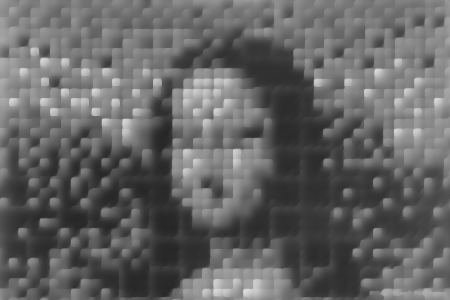

In [9]:
Image.fromarray(U).convert('L')

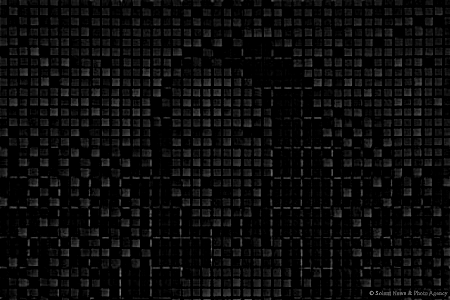

In [10]:
Image.fromarray(T).convert('L')